## Gán giá trị là biến hạng mục

Đây là phương pháp xử lý dữ liệu bị khuyết cho các biến hạng mục được sử dụng rộng rãi nhất. Phương pháp này gồm việc xử lý dữ liệu bị khuyết như nhãn hoặc hạng mục bổ sung của biến. Tất cả các quan sát bị khuyết được nhóm lại trong nhãn 'Missing' mới được tạo.

Về bản chất, điều này tương đương với việc thay thế bằng một giá trị bất kỳ cho các biến dạng số.

Điều tuyệt vời của kỹ thuật này nằm ở chỗ nó không giả định bất cứ điều gì về dữ liệu bị khuyết, phù hợp khi có nhiều dữ liệu bị khuyết.


### Ưu điểm

- Dễ thực hiện.
- Cách nhanh chóng để có được tập dữ liệu hoàn chỉnh.
- Có thể tích hợp trong sản xuất (trong quá trình triển khai mô hình).
- Nắm bắt được tầm quan trọng của "khuyết" nếu có.
- Không có giả định về dữ liệu.


### Hạn chế

- Nếu số lượng NA nhỏ thì việc tạo hạng mục bổ sung có thể khiến cây bị overfitting.

Đây là phương pháp được chọn cho các biến hạng mục, vì nó coi các giá trị bị khuyết như một hạng mục riêng biệt mà không đưa ra bất kỳ giả định nào về biến hoặc lý do dữ liệu có thể bị khuyết. Nó được sử dụng rộng rãi trong các tổ chức và cuộc thi khoa học dữ liệu. Xem ví dụ về giải pháp giành chiến thắng trong KDD 2009 Cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).
 
## Trong bản mô phỏng này:

Chúng ta sẽ sử dụng tập dữ liệu giá nhà để biểu diễn cách thực hiện gán ở các biến hạng mục.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# chia các tập dữ liệu
from sklearn.model_selection import train_test_split

### Tập dữ liệu giá nhà

In [2]:
# load tập dữ liệu với một số biến để biểu diễn

# có các cột hạng mục và mục tiêu SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('./datatset/house-price/houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [3]:
# kiểm tra phần trăm các giá trị bị khuyết ở từng biến

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

Khi thay thế NA trong các biến hạng mục bằng nhãn 'Missing', chúng ta không học được gì từ tập huấn luyện, vì vậy về nguyên tắc, chúng ta có thể thực hiện điều này trong tập dữ liệu ban đầu rồi tách thành tập huấn luyện và tập kiểm tra. Tuy nhiên, tôi không khuyến khích thực hành này. Chúng ta sẽ thấy việc chia nhỏ thành tập huấn luyện và tập kiểm tra ngay từ đầu sẽ giúp xây dựng quy trình học máy trong các notebook sau. Vì vậy, hãy tiếp tục với thực hành này ở đây.

In [4]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [5]:
# nhớ lại % các giá trị bị khuyết
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

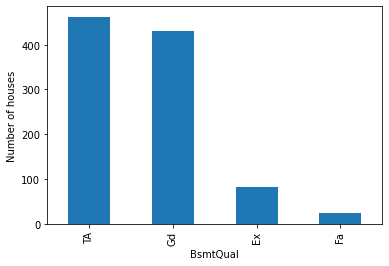

In [6]:
# kiểm tra số lượng quan sát trên mỗi hạng mục trong BsmtQual

# value_counts() đếm số nhà hiển thị từng nhãn
# trong biến được chỉ ra bên dưới

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [7]:
# Yêu cầu 1: điền na ở cả tập huấn luyện và tập kiểm tra

# sử dụng phương thức fillna() từ pandas

# đối số inplace=True cho pandas biết
# chúng ta muốn giá trị đã thay thế trong cùng tập dữ liệu

## VIẾT CODE Ở ĐÂY:
X_train['BsmtQual'].fillna('Missing', inplace = True)
X_test['BsmtQual'].fillna('Missing', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<details><summary> Gợi ý </summary>

[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

</details>

Text(0, 0.5, 'Number of houses')

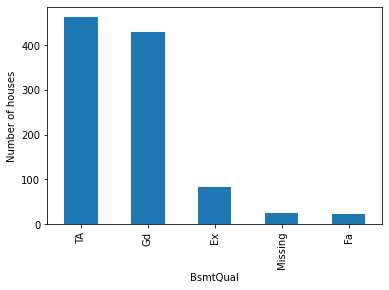

In [11]:
# Yêu cầu 2: vẽ biểu đồ số lượng trên mỗi hạng mục trong biến được gán

## VIẾT CODE Ở ĐÂY:
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

<details><summary> Gợi ý </summary>

[value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

[plot.bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

Giờ chúng ta đã thấy hạng mục bổ sung với dữ liệu bị khuyết: Missing

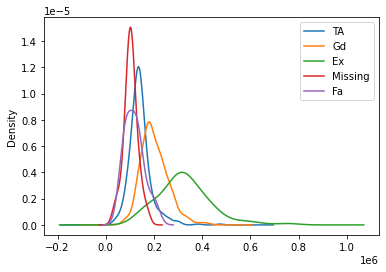

In [12]:
# vẽ biểu đồ phân phối mục tiêu cho các ngôi nhà mà
# hiển thị các hạng mục khác nhau của biến

fig = plt.figure()
ax = fig.add_subplot(111)

# một biểu đồ mỗi hạng mục
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# thêm legend
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

Có thể thấy những ngôi nhà có các nhãn khác nhau sẽ hiển thị các phân phối khác nhau của Price. Ví dụ: những ngôi nhà có nhãn Ex có xu hướng đắt nhất, trong khi những ngôi nhà có nhãn Missing hoặc Fa rẻ nhất.

#### FirePlaceQu

In [ ]:
## Yêu cầu 3

In [13]:
# nhớ lại % các giá trị bị khuyết

## VIẾT CODE Ở ĐÂY:
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

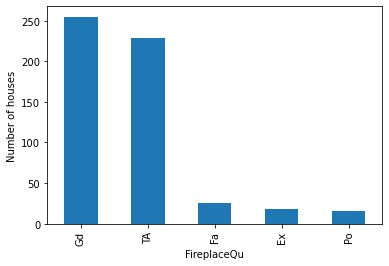

In [14]:
# kiểm tra số quan sát trên mỗi hạng mục

## VIẾT CODE Ở ĐÂY:
X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [15]:
# hãy điền na ở cả tập huấn luyện và tập kiểm tra

## VIẾT CODE Ở ĐÂY:
X_train['FireplaceQu'].fillna('Missing', inplace = True)
X_test['FireplaceQu'].fillna('Missing', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Text(0, 0.5, 'Number of houses')

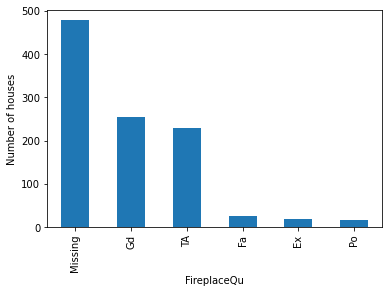

In [16]:
# kiểm tra số quan sát trên mỗi hạng mục
# trong biến đã gán

## VIẾT CODE Ở ĐÂY:
X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

Chúng ta thấy hạng mục bổ sung với dữ liệu bị khuyết: Missing

Nhãn này chứa hầu hết các ngôi nhà vì phần lớn hiển thị dữ liệu bị khuyết ban đầu.

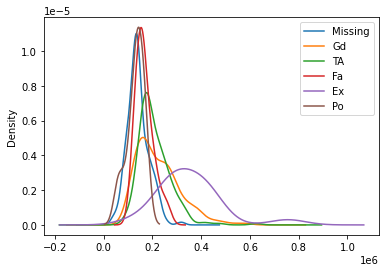

In [17]:
# vẽ biểu đồ phân phối mục tiêu cho các ngôi nhà mà
# hiển thị các hạng mục khác nhau của biến

fig = plt.figure()
ax = fig.add_subplot(111)

# một biểu đồ mỗi hạng mục
## VIẾT CODE Ở ĐÂY:
X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind = 'kde',ax = ax)
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind = 'kde',ax = ax)
X_train[X_train['FireplaceQu']=='TA']['SalePrice'].plot(kind = 'kde',ax = ax)
X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind = 'kde',ax = ax)
X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind = 'kde',ax = ax)
X_train[X_train['FireplaceQu']=='Po']['SalePrice'].plot(kind = 'kde',ax = ax)



# thêm legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

Một lần nữa, chúng ta quan sát thấy các ngôi nhà có nhãn khác nhau cho FirePlaceQu cũng hiển thị các phân phối khác nhau của SalePrice, với các nhãn hiển thị Ex là những ngôi nhà đắt nhất và các nhãn hiển thị Missing hoặc Fa là những ngôi nhà rẻ nhất.

**Trong notebook sau, chúng ta sẽ xem cách tự động hóa điều này với scikit-learn và feature engine.**

In [18]:
# BONUS: trong trường hợp cần vẽ biểu đồ cho phân tích:
# đây là cách thực hiện tổng quát


def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # thêm legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()
        

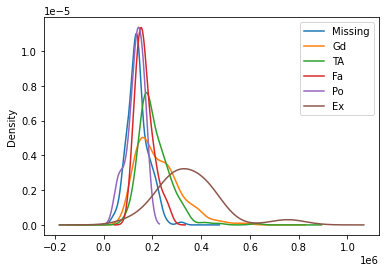

In [19]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

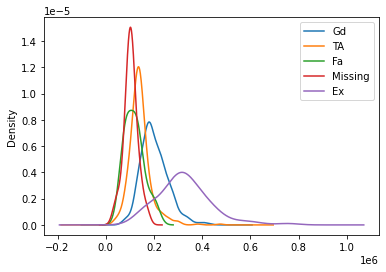

In [20]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')